- https://www.geeksforgeeks.org/sarima-seasonal-autoregressive-integrated-moving-average/
- https://medium.com/@mertsukrupehlivan/mastering-time-series-forecasting-a-guide-to-hyperparameter-tuning-for-sarimax-models-b4a84062cba3

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [15]:
df = pd.read_json('sample/product-001.json')
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = df['y'].astype(float)

In [16]:
# Check if the data is stationary
result = adfuller(df['y'], autolag='AIC')
p_value = result[1]
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {p_value}')
print('Stationary' if p_value < 0.05 else 'Non-Stationary')

ADF Statistic: -3.409454969877531
p-value: 0.010640744328526786
Stationary


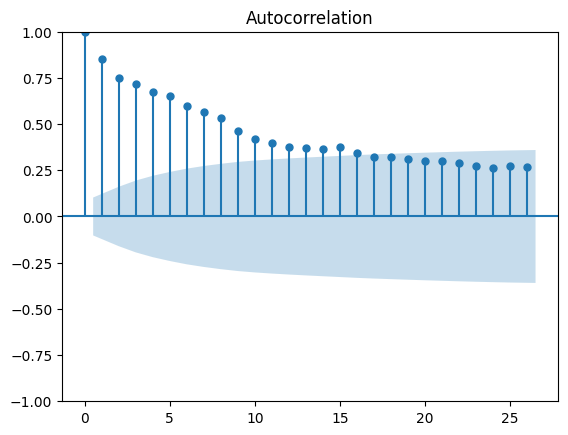

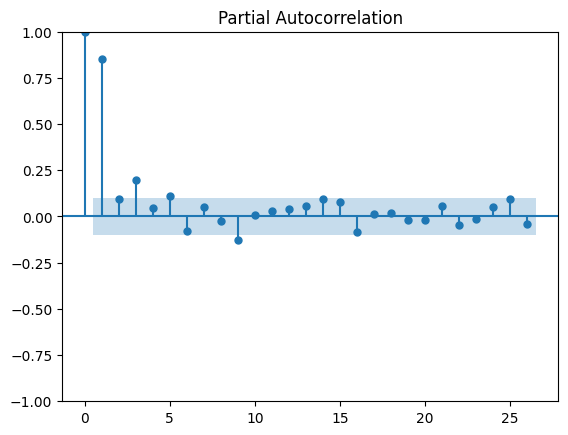

In [17]:
# Check for SARIMA parameters
plot_acf(df['y'])
plot_pacf(df['y'])
plt.show()

In [48]:
# Define SARIMA parameters
# p = How many past numbers we look at to predict the next one.
# d = How many times we change the data to make it steady.
# q = How many past prediction errors we use to improve the next one.
# P = How many past seasonal numbers we look at to predict the next one.
# D = How many times we change the seasonal data to make it steady.
# Q = How many past seasonal prediction errors we use to improve the next one.
# s = How many steps make up one season.

p, d, q = 2, 1, 1
P, D, Q, s = 2, 1, 1, 7  # Quarterly seasonality (90 days)

# Fit the SARIMA model
model = SARIMAX(df['y'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


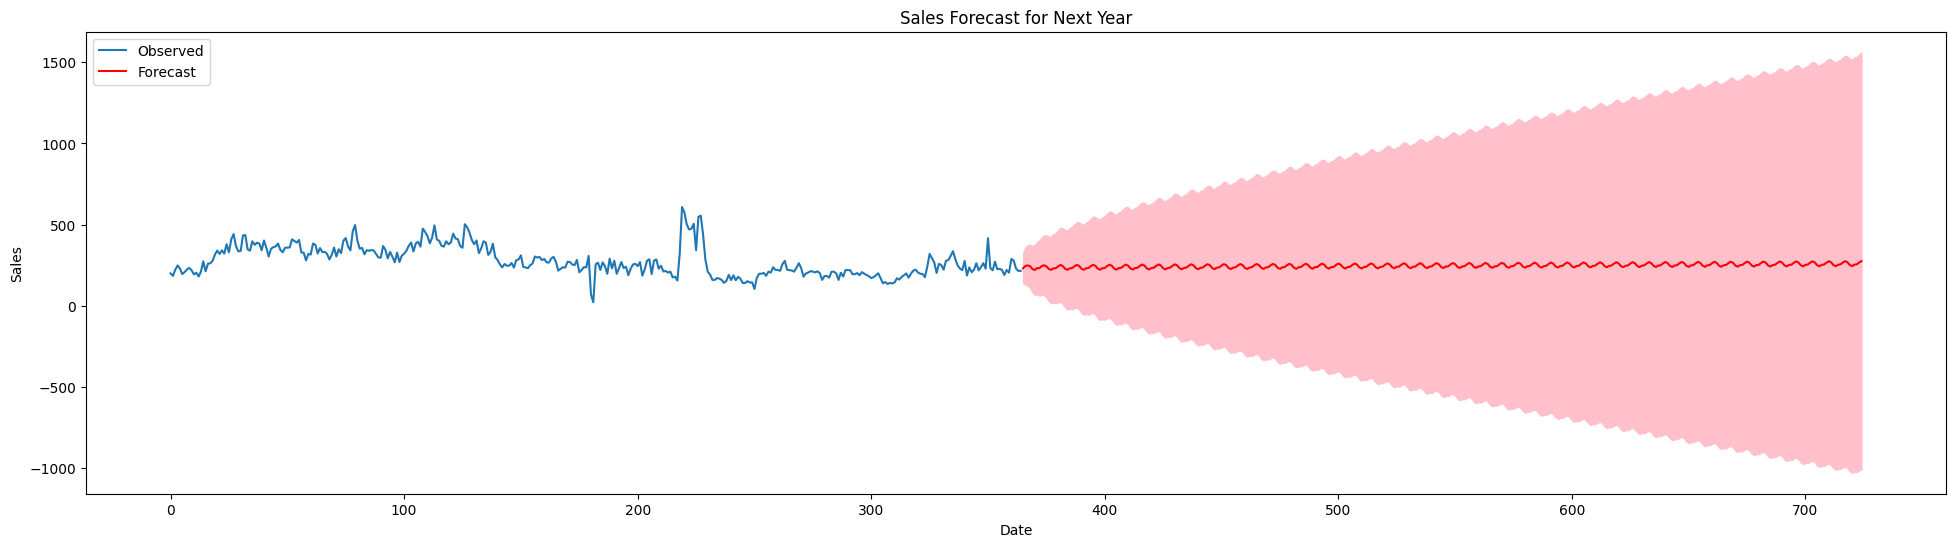

In [49]:
# Forecast future values
forecast_periods = 360  # Forecast the next 360 days (1 year)
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(24, 6))
plt.plot(df['y'], label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Sales Forecast for Next Year")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()